In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex1data2.txt')

In [3]:
data.describe() 


,square feet,num of bed rooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [6]:
features = data[['square feet','num of bed rooms']].to_numpy()
def feature_normalization(X):
    mean = np.mean(features, axis = 0)
    davaition = np.std(features, axis = 0)
    X_norm = (X - mean)/davaition
    return X_norm, mean, davaition

In [8]:
X_not_normalized = data[['square feet','num of bed rooms']].to_numpy()
X1, mean, std = feature_normalization(X_not_normalized)
m = len(X1[:,0])                                 # 47
X1 = np.append(np.ones((m,1)), X1, axis = 1)     #X1 = (47, 3)


Y =  data[['price']].to_numpy()     # (47, 1) 
theta = np.zeros((3,1))              #(3,1)
Y.shape
mean

array([2000.68085106,    3.17021277])

In [9]:
def costfunction(X, Y, theta):
    m = len(Y)
    #predictions =  X.dot(theta)                    #47*1
    
    predictions =  np.dot(X, theta)   
    square_err=(predictions - Y)**2        
    
    return 1/(2*m) * np.sum(square_err)

c = costfunction(X1, Y, theta)
c


65591548106.45744

In [10]:
def gradient_Descent(theta, X, Y, num_iters, alpha):
    m = len(X[:,0])
    j_history = []
    for i in range(num_iters):
        predictions =  np.dot(X, theta) - Y       #(47, 1)
        h_x = np.dot(X.transpose(), predictions)
        theta = theta - (alpha/m)*h_x
        j_history.append(costfunction(X, Y, theta))
        
    return j_history,theta

j_his, theta = gradient_Descent(theta, X1, Y, 400,0.01)
theta    
    

array([[334302.06399328],
       [ 99411.44947359],
       [  3267.01285407]])

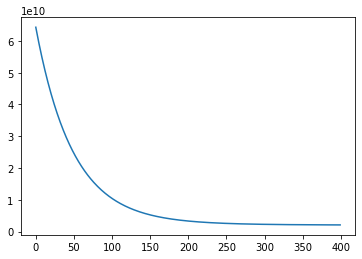

In [14]:
plt.plot(j_his)

In [12]:
def predict(x, theta):
    
    prediction = np.dot(theta.transpose(),x)
    return prediction[0]


x_sample = feature_normalization(np.array([1650,3]))[0]
x_sample = np.append(np.ones(1),x_sample)
predict3 = predict(x_sample,theta)
predict3

289221.5473712181

In [13]:
x_sample

array([ 1.        , -0.44604386, -0.22609337])